C:\Users\ericsc\AppData\Local\Temp\ipykernel_13636\655226253.py:15: RuntimeWarning: invalid value encountered in sqrt
  return C**alpha * L**beta
C:\Users\ericsc\AppData\Local\Temp\ipykernel_13636\655226253.py:15: RuntimeWarning: invalid value encountered in scalar power
  return C**alpha * L**beta


Equilibrium Labor without tax: 9.596864745871008
Equilibrium Wage without tax: 10.403135254128992
Equilibrium Consumption without tax: 199.83776413221747
Equilibrium Labor with tax: 9.125959741743463
Equilibrium Wage with tax: 10.874040258256537
Equilibrium Consumption with tax: 211.74091257121003
Compensating Variation (CV): -1180.3398874989489
Equivalent Variation (EV): -4999.999892373624


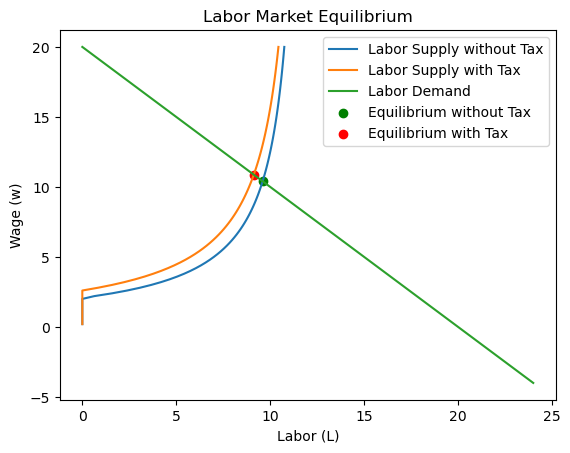

In [3]:
import numpy as np
from scipy.optimize import minimize, fminbound, brentq
import matplotlib.pyplot as plt

# Utility function parameters
alpha = 0.5
beta = 0.5
T = 24
y = 50
t = 0.2
A = 20
B = 1

def utility(C, L):
    return C**alpha * L**beta

def budget_without_tax(L, w):
    C = w * (T - L) + y
    return -utility(C, L)

def budget_with_tax(L, w):
    C = (1 - t) * w * (T - L) + y
    return -utility(C, L)

# Labor demand curve: w = A - B*L
def labor_demand(L):
    return A - B * L

def labor_supply_no_tax(w):
    result = minimize(budget_without_tax, x0=[T/2], args=(w,), bounds=[(0, T)], method='L-BFGS-B')
    L_no_tax = result.x[0]
    return T - L_no_tax

def labor_supply_with_tax(w):
    result = minimize(budget_with_tax, x0=[T/2], args=(w,), bounds=[(0, T)], method='L-BFGS-B')
    L_with_tax = result.x[0]
    return T - L_with_tax

# Generate labor supply data
wage_rates = np.linspace(0.2, A, 100)
labor_supplies_no_tax = np.array([labor_supply_no_tax(w) for w in wage_rates])
labor_supplies_with_tax = np.array([labor_supply_with_tax(w) for w in wage_rates])

# Function to find equilibrium without tax
def equilibrium_no_tax(L):
    w_supply = np.interp(L, labor_supplies_no_tax, wage_rates)
    w_demand = labor_demand(L)
    return w_supply - w_demand

# Function to find equilibrium with tax
def equilibrium_with_tax(L):
    w_supply = np.interp(L, labor_supplies_with_tax, wage_rates)
    w_demand = labor_demand(L)
    return w_supply - w_demand

# Bracket for finding root
bracket_no_tax = (0, max(labor_supplies_no_tax))
bracket_with_tax = (0, max(labor_supplies_with_tax))

L_eq_no_tax = brentq(equilibrium_no_tax, *bracket_no_tax)
w_eq_no_tax = labor_demand(L_eq_no_tax)

L_eq_with_tax = brentq(equilibrium_with_tax, *bracket_with_tax)
w_eq_with_tax = labor_demand(L_eq_with_tax)

# Replace these with actual functions for calculation if necessary
C_no_tax = w_eq_no_tax * (T - L_eq_no_tax) + y
U_no_tax = utility(C_no_tax, T - L_eq_no_tax)
C_with_tax = w_eq_with_tax * (T - L_eq_with_tax) + y
U_with_tax = utility(C_with_tax, T - L_eq_with_tax)

def budget_with_compensation(L, compensation, w):
    C = (1 - t) * w * (T - L) + y + compensation
    return -utility(C, L)

def find_cv(compensation):
    result_with_cv = minimize(budget_with_compensation, x0=[T/2], args=(compensation, w_eq_with_tax), bounds=[(0, T)], method='L-BFGS-B')
    return -budget_with_compensation(result_with_cv.x[0], compensation, w_eq_with_tax) - U_no_tax

cv = fminbound(find_cv, -5000, 5000)

def find_ev(equivalent):
    result_with_ev = minimize(budget_without_tax, x0=[T/2], args=(w_eq_no_tax,), bounds=[(0, T)], method='L-BFGS-B')
    return -budget_without_tax(result_with_ev.x[0], w_eq_no_tax) - U_with_tax + equivalent

ev = fminbound(find_ev, -5000, 5000)

print(f"Equilibrium Labor without tax: {L_eq_no_tax}")
print(f"Equilibrium Wage without tax: {w_eq_no_tax}")
print(f"Equilibrium Consumption without tax: {C_no_tax}")
print(f"Equilibrium Labor with tax: {L_eq_with_tax}")
print(f"Equilibrium Wage with tax: {w_eq_with_tax}")
print(f"Equilibrium Consumption with tax: {C_with_tax}")
print(f"Compensating Variation (CV): {cv}")
print(f"Equivalent Variation (EV): {ev}")

# Plotting the results
fig, ax = plt.subplots()
Ls = np.linspace(0, T, 100)
wages_demand = labor_demand(Ls)

ax.plot(labor_supplies_no_tax, wage_rates, label='Labor Supply without Tax')
ax.plot(labor_supplies_with_tax, wage_rates, label='Labor Supply with Tax')
ax.plot(Ls, wages_demand, label='Labor Demand')
ax.scatter([L_eq_no_tax], [w_eq_no_tax], color='green', label='Equilibrium without Tax')
ax.scatter([L_eq_with_tax], [w_eq_with_tax], color='red', label='Equilibrium with Tax')
ax.set_xlabel('Labor (L)')
ax.set_ylabel('Wage (w)')
plt.title('Labor Market Equilibrium')
plt.legend()
plt.show()